In [ ]:
import kagglehub
import os


print("Downloading dataset...")
downloaded_path = kagglehub.dataset_download("rewa77/dataset-for-vegatables")
print(f"Dataset downloaded to: {downloaded_path}")

dir = "veg_dataset"
working_dir = os.path.join("/content", dir)

print(f"Copying files from {downloaded_path} to {working_dir}...")

# Copy dataset from downloaded path to working directory in /content
!cp -r "{downloaded_path}" "{working_dir}"


100%|██████████| 243M/243M [00:01<00:00, 160MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/rewa77/dataset-for-vegatables/versions/1
Copying files from /root/.cache/kagglehub/datasets/rewa77/dataset-for-vegatables/versions/1 to /content/veg_dataset...


In [ ]:
import os
import random
import shutil
import math

# original training image/label paths
original_train_dir = os.path.join(working_dir, "train")
original_img_dir = os.path.join(original_train_dir, "images")
original_lbl_dir = os.path.join(original_train_dir, "labels")

# directories for splitting the dataset
train_dir = "train_split"
valid_dir = "valid_split"
test_dir = "test_split"

# Output directory paths for train valid test
train_dir = os.path.join(working_dir, train_dir)
valid_dir = os.path.join(working_dir, valid_dir)
test_dir = os.path.join(working_dir, test_dir)



num_test_images = 10

# Train/Valid split ratio
valid_ratio = 0.20
random.seed(42)

# Get all images from directory
all_images = [f for f in os.listdir(original_img_dir)]

if not all_images:
    print(f"Error: No image files found in {original_img_dir}")
else:
    print(f"Found {len(all_images)} images in {original_img_dir}")

    # Shuffle images
    random.shuffle(all_images)

    # Allocate images for test
    test_images = all_images[:num_test_images] # First 10 test images
    remaining_images = all_images[num_test_images:] # Remaining images
    print(f"Allocated {len(test_images)} images for the test set.")
    print(f"{len(remaining_images)} images remaining for train/validation split.")


    # Calculate split size
    num_remaining = len(remaining_images)
    num_valid = math.ceil(num_remaining * valid_ratio)
    num_train = len(all_images) - num_valid
    train_images = remaining_images[:num_train]
    valid_images = remaining_images[num_train:]
    print(f"Splitting into {num_train} training and {num_valid} validation images.")

    # New directories for train, valid, test
    for dir_path in [train_dir, valid_dir, test_dir]:
        os.makedirs(os.path.join(dir_path, "images"), exist_ok=True)
        os.makedirs(os.path.join(dir_path, "labels"), exist_ok=True)
    print("Created new directories for train_split, valid_split, and test_split.")

    # Function to copy files from source to output destination.
    def copy_files(image_list, source_img_dir, source_lbl_dir, dest_dir):
        copied_count = 0
        print(f"Copying files to {dest_dir}...")
        img_dest = os.path.join(dest_dir, "images")
        lbl_dest = os.path.join(dest_dir, "labels")
        for img_filename in image_list:
            base_filename = os.path.splitext(img_filename)[0]
            lbl_filename = base_filename + ".txt"

            # Source paths
            src_img_path = os.path.join(source_img_dir, img_filename)
            src_lbl_path = os.path.join(source_lbl_dir, lbl_filename)

            # Destination paths
            dest_img_path = os.path.join(img_dest, img_filename)
            dest_lbl_path = os.path.join(lbl_dest, lbl_filename)

            # Copy image
            if os.path.exists(src_img_path):
                  shutil.copy2(src_img_path, dest_img_path)
                  copied_count +=1

            # Copy label
            if os.path.exists(src_lbl_path):
                shutil.copy2(src_lbl_path, dest_lbl_path)

        print(f"Copied {copied_count} images.")


    # Copy files to new train/valid/test directories
    copy_files(train_images, original_img_dir, original_lbl_dir, train_dir)
    copy_files(valid_images, original_img_dir, original_lbl_dir, valid_dir)
    copy_files(test_images, original_img_dir, original_lbl_dir, test_dir)

    print("Finished copying files.")
    # Check the destination directories and list images/labels count
    print(f"Training images: {len(os.listdir(os.path.join(train_dir, 'images')))}")
    print(f"Training labels: {len(os.listdir(os.path.join(train_dir, 'labels')))}")
    print(f"Validation images: {len(os.listdir(os.path.join(valid_dir, 'images')))}")
    print(f"Validation labels: {len(os.listdir(os.path.join(valid_dir, 'labels')))}")
    print(f"Test images: {len(os.listdir(os.path.join(test_dir, 'images')))}")
    print(f"Test labels: {len(os.listdir(os.path.join(test_dir, 'labels')))}")

Found 7952 images in /content/veg_dataset/train/images
Allocated 10 images for the test set.
7942 images remaining for train/validation split.
Splitting into 6363 training and 1589 validation images.
Created new directories for train_split, valid_split, and test_split.
Copying files to /content/veg_dataset/train_split...
 - Copied 6363 images (and labels if found).
Copying files to /content/veg_dataset/valid_split...
 - Copied 1579 images (and labels if found).
Copying files to /content/veg_dataset/test_split...
 - Copied 10 images (and labels if found).
Finished copying files.
 - Training images: 6363
 - Training labels: 6363
 - Validation images: 1579
 - Validation labels: 1579
 - Test images: 10
 - Test labels: 10


In [ ]:
# Load and display yaml contents
yaml_path = os.path.join(working_dir, "data.yaml")

print(f"Contents of {yaml_path}:")
!cat "{yaml_path}"

Contents of /content/veg_dataset/data.yaml:
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 26
names: ['avocado', 'beans', 'beet', 'bell pepper', 'broccoli', 'brus capusta', 'cabbage', 'carrot', 'cayliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'fasol', 'garlic', 'hot pepper', 'onion', 'peas', 'potato', 'pumpkin', 'rediska', 'redka', 'salad', 'squash-patisson', 'tomato', 'vegetable marrow']

roboflow:
  workspace: test-on9hk
  project: vegetables-kacga
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/test-on9hk/vegetables-kacga/dataset/5

In [ ]:
import os

final_yaml_content = """
path: /content/veg_dataset  # Dataset root directory
train: train_split/images   # Path to training images relative to 'path'
val: valid_split/images     # Path to validation images relative to 'path'
test: test_split/images     # Path to test images relative to 'path'

nc: 26
names: ['avocado', 'beans', 'beet', 'bell pepper', 'broccoli', 'brus capusta', 'cabbage', 'carrot', 'cayliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'fasol', 'garlic', 'hot pepper', 'onion', 'peas', 'potato', 'pumpkin', 'rediska', 'redka', 'salad', 'squash-patisson', 'tomato', 'vegetable marrow']

# Roboflow section (optional metadata - can be kept or removed)
roboflow:
  workspace: test-on9hk
  project: vegetables-kacga
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/test-on9hk/vegetables-kacga/dataset/5
"""

# Overwrite old yaml with new info
with open(yaml_path, 'w') as f:
    # removes whitespace
    f.write(final_yaml_content.strip())

# Verify
with open(yaml_path, 'r') as f:
    print(f.read())



path: /content/veg_dataset  # Dataset root directory
train: train_split/images   # Path to training images relative to 'path'
val: valid_split/images     # Path to validation images relative to 'path'
test: test_split/images     # Path to test images relative to 'path'

nc: 26
names: ['avocado', 'beans', 'beet', 'bell pepper', 'broccoli', 'brus capusta', 'cabbage', 'carrot', 'cayliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'fasol', 'garlic', 'hot pepper', 'onion', 'peas', 'potato', 'pumpkin', 'rediska', 'redka', 'salad', 'squash-patisson', 'tomato', 'vegetable marrow']

# Roboflow section (optional metadata - can be kept or removed)
roboflow:
  workspace: test-on9hk
  project: vegetables-kacga
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/test-on9hk/vegetables-kacga/dataset/5


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
# Train
!yolo train \
  data="/content/veg_dataset/data.yaml" \
  model=yolov8n.pt \
  epochs=50 \
  batch=64 \ # Lower this if GPU doesn't have enough RAM
  workers=4 \
  imgsz=640 \
  device=0 \
  name="veg_yolov8n_train1" # Name of the output dir for this model's training


100% 6.25M/6.25M [00:00<00:00, 111MB/s]
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/veg_dataset/data.yaml, epochs=50, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=veg_yolov8n_train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

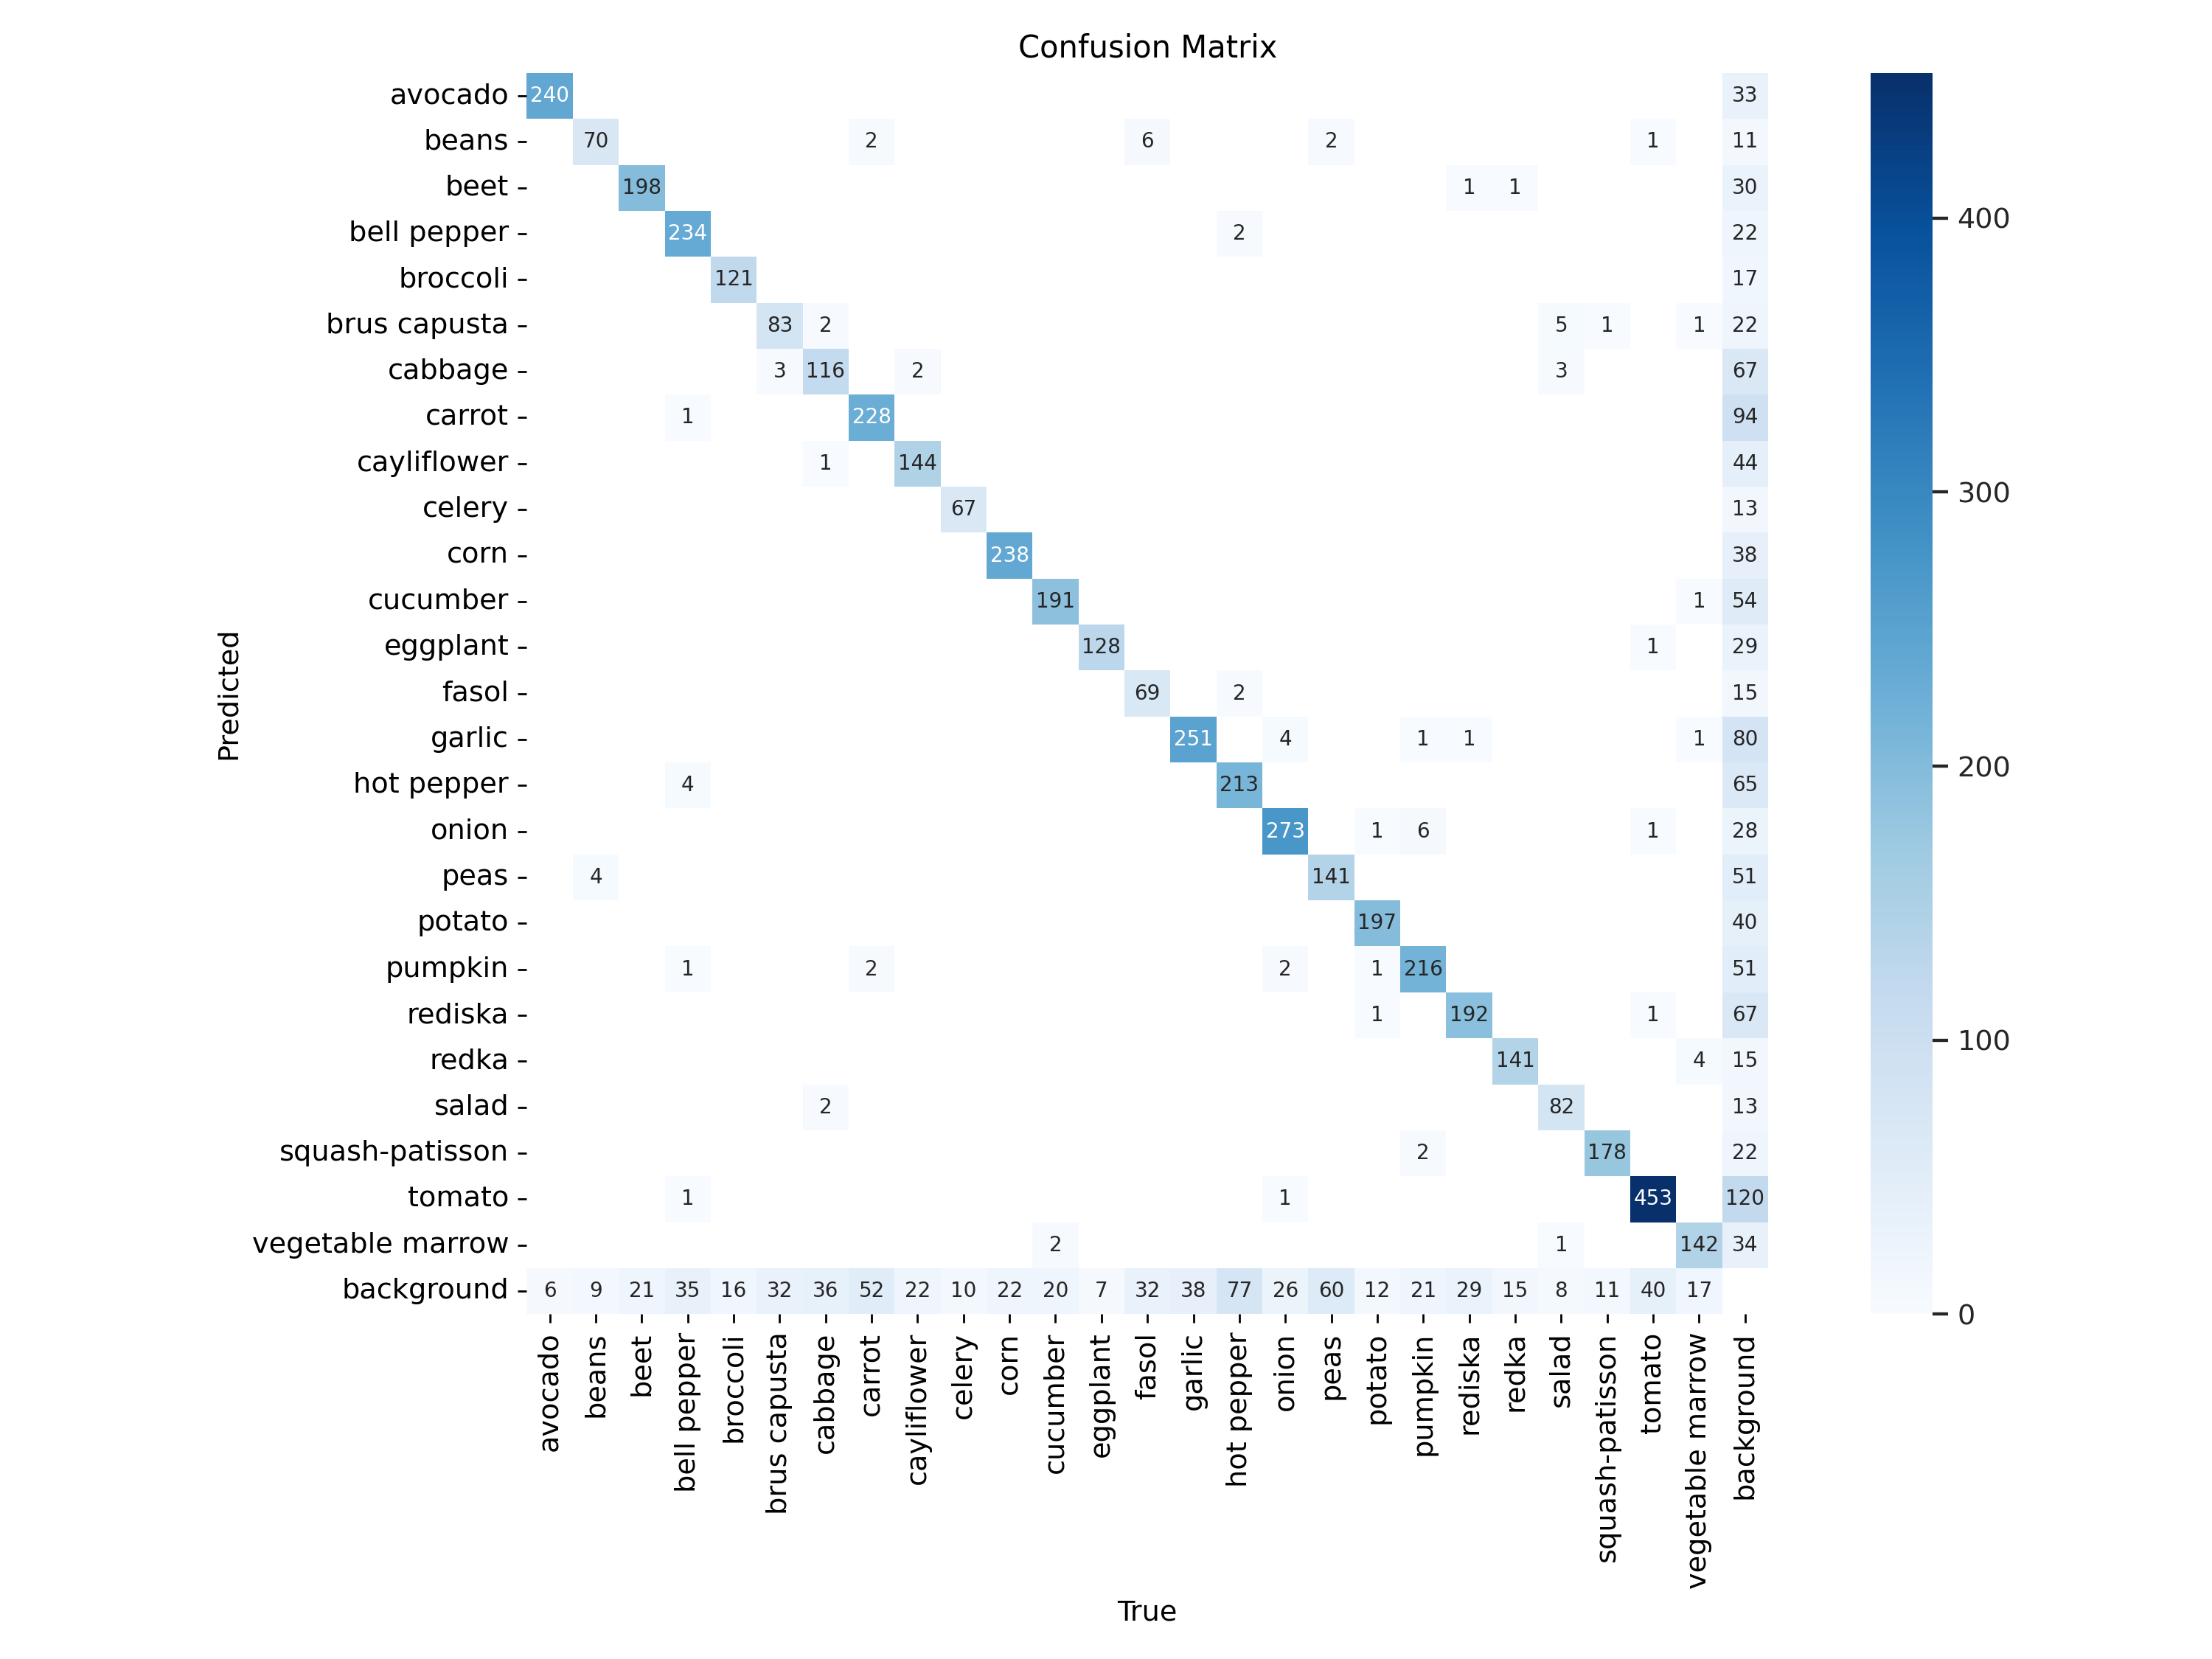

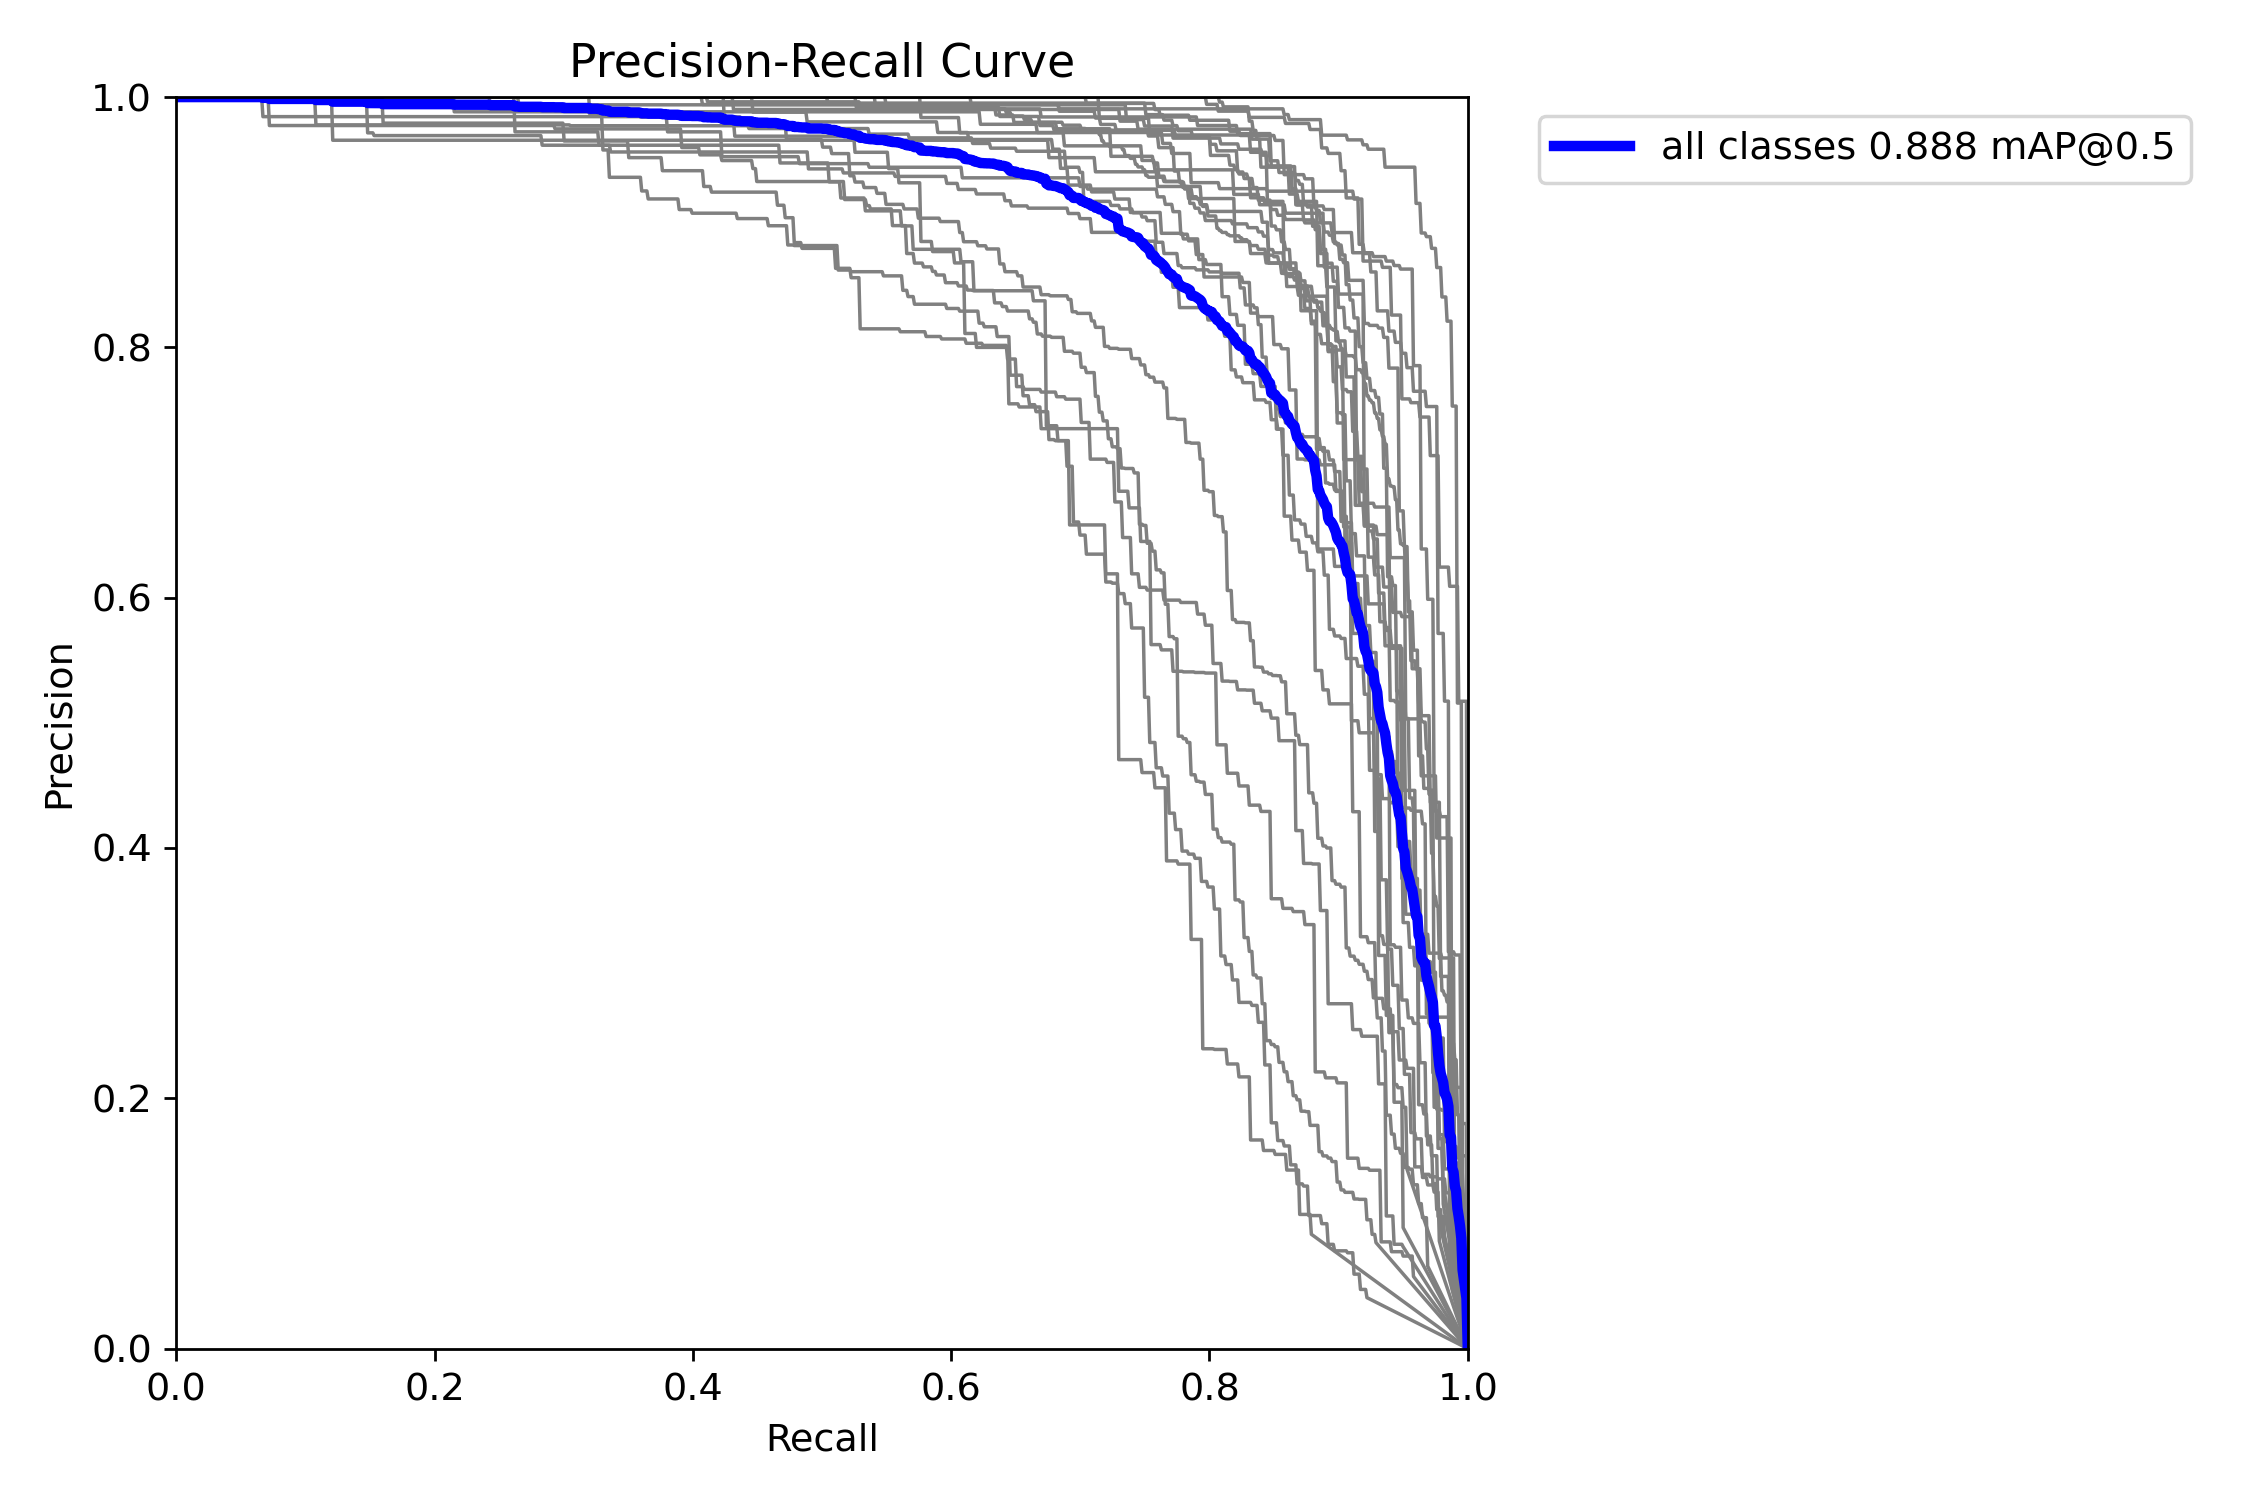

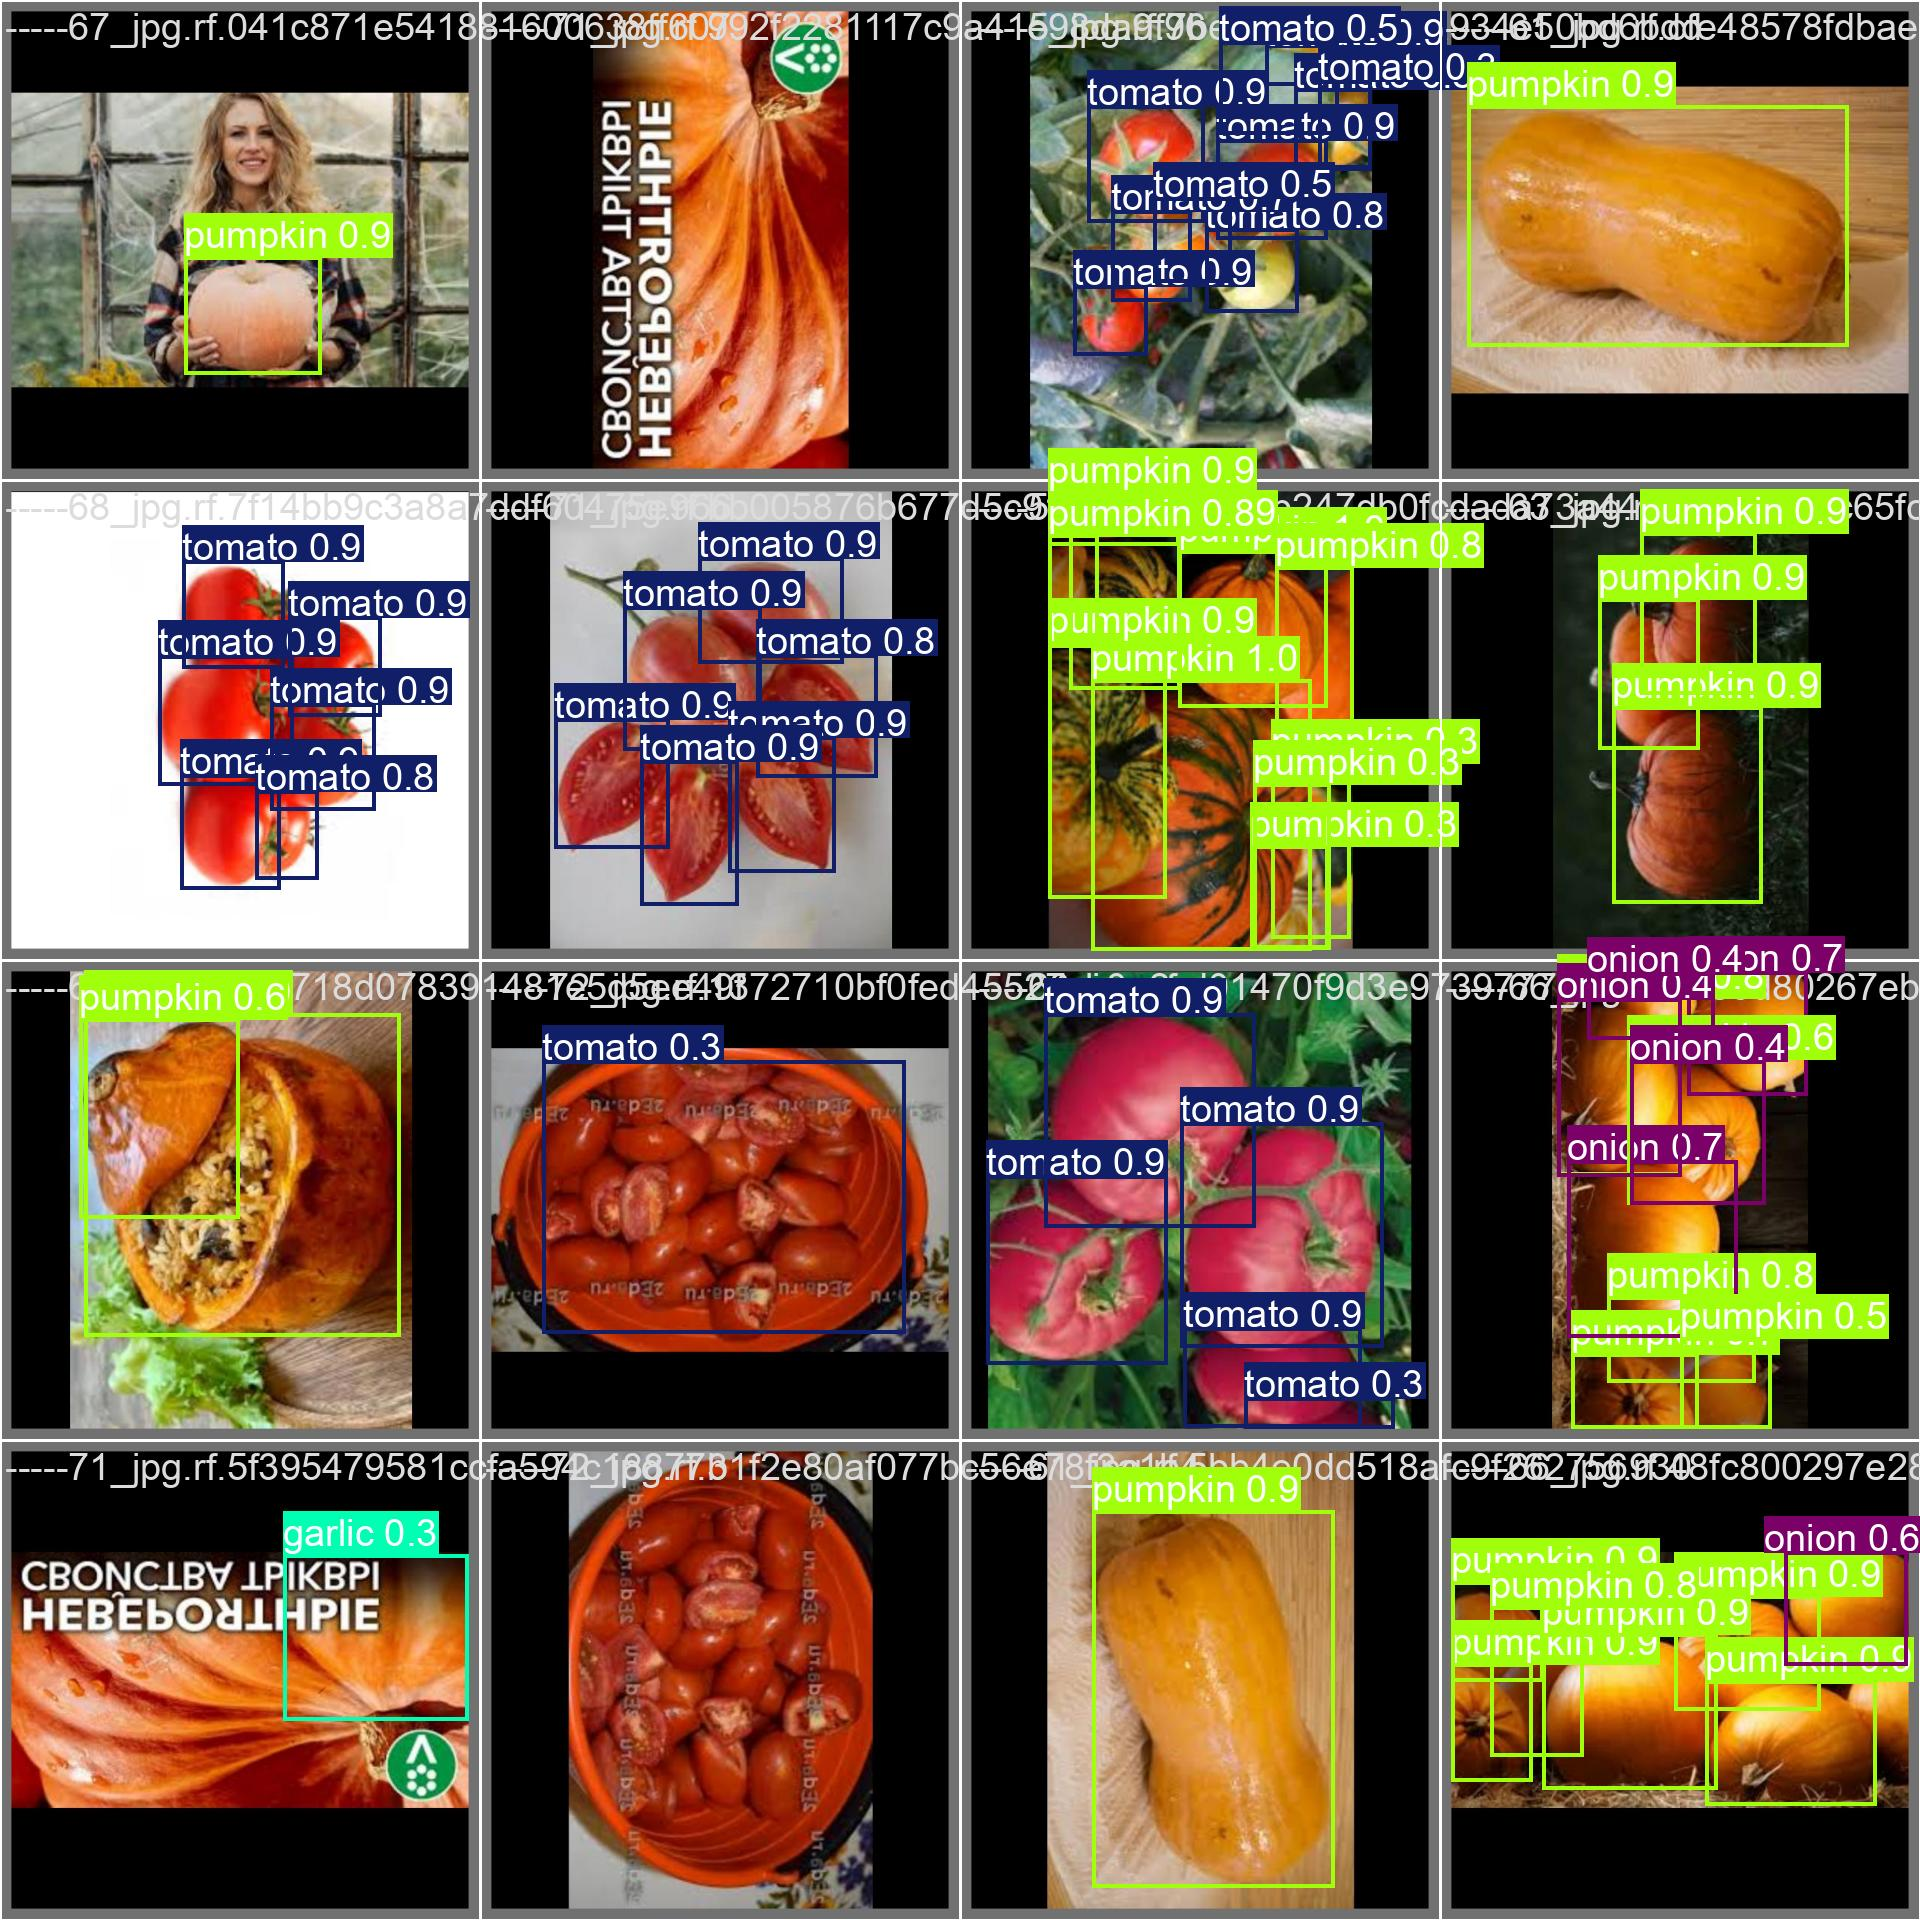

In [ ]:
from IPython.display import Image, display
import os

train_run_dir = "/content/runs/detect/veg_yolov8n_train12"

confusion_matrix_path = os.path.join(train_run_dir, "confusion_matrix.png")
display(Image(filename=confusion_matrix_path, width=600))

pr_curve_path = os.path.join(train_run_dir, "PR_curve.png")
display(Image(filename=pr_curve_path, width=600))

val_pred_path = os.path.join(train_run_dir, "val_batch0_pred.jpg")

display(Image(filename=val_pred_path))
